In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
Data=pd.read_csv('C:/Users/Lavanya udhayakumar/Project/Data Set/spam_sms.csv')

In [3]:
Data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
Data.columns

Index(['v1', 'v2'], dtype='object')

In [5]:
Data=Data.rename(columns={'v1':'type','v2':'message'})

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   type     5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
Data.isnull().sum()

type       0
message    0
dtype: int64

In [8]:
check=lambda x:1 if x=='spam' else 0

In [9]:
Data['category']=Data['type'].apply(check)
Data

,type,message,category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [10]:
Data.duplicated().sum()

403

In [11]:
Data=Data.drop_duplicates()

In [12]:
Data.duplicated().sum()


0

In [13]:
count=Data['category'].value_counts()
count

category
0    4516
1     653
Name: count, dtype: int64

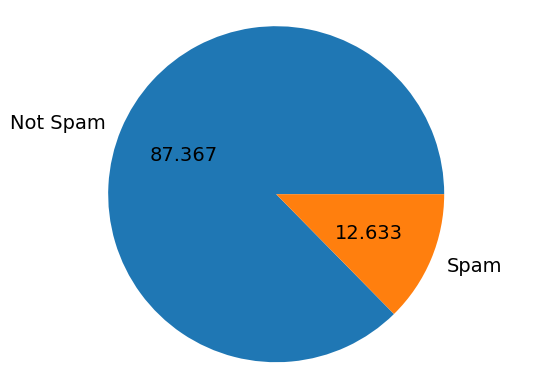

<Figure size 1000x1000 with 0 Axes>

In [14]:
plt.pie(count,labels=['Not Spam','Spam'],autopct='%0.3f',textprops={'fontsize':14})
plt.axis('equal')
plt.figure(figsize=(10,10))
plt.show()

In [15]:
Data['num_character']=Data['message'].apply(len)
Data.head()

C:\Users\Lavanya udhayakumar\AppData\Local\Temp\ipykernel_20544\4095772436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['num_character']=Data['message'].apply(len)


,type,message,category,num_character
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [16]:
from nltk.tokenize import word_tokenize
words= lambda x: len(nltk.word_tokenize(x))
sentence= lambda x: len(nltk.sent_tokenize(x))

In [17]:
Data['num_words']=Data['message'].apply(words)
Data.head()

C:\Users\Lavanya udhayakumar\AppData\Local\Temp\ipykernel_20544\1270384503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['num_words']=Data['message'].apply(words)


,type,message,category,num_character,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24
1,ham,Ok lar... Joking wif u oni...,0,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,ham,U dun say so early hor... U c already then say...,0,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [18]:
Data['num_sentence']=Data['message'].apply(sentence)
Data.head()

C:\Users\Lavanya udhayakumar\AppData\Local\Temp\ipykernel_20544\191093307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['num_sentence']=Data['message'].apply(sentence)


,type,message,category,num_character,num_words,num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [19]:
ham=Data[Data['category']==0][['num_character','num_words','num_sentence']]

In [20]:
ham.describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
spam=Data[Data['category']==1][['num_character','num_words','num_sentence']]
spam.head()

,num_character,num_words,num_sentence
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3


In [22]:
spam.describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


C:\Users\Lavanya udhayakumar\DS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lavanya udhayakumar\DS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

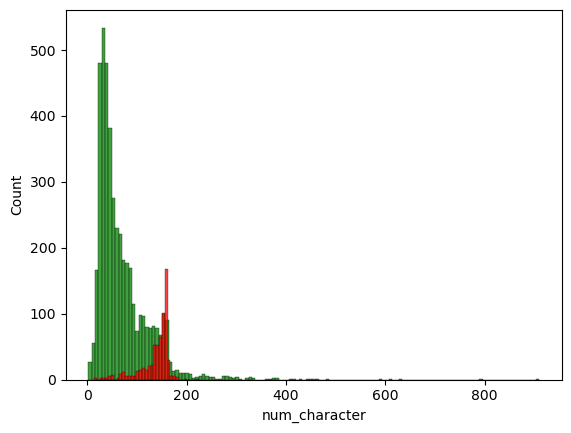

<Figure size 1400x800 with 0 Axes>

In [23]:
sns.histplot(Data[Data['category']==0]['num_character'],color='green')
sns.histplot(Data[Data['category']==1]['num_character'],color='Red')
plt.figure(figsize=(14,8))

C:\Users\Lavanya udhayakumar\DS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lavanya udhayakumar\DS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

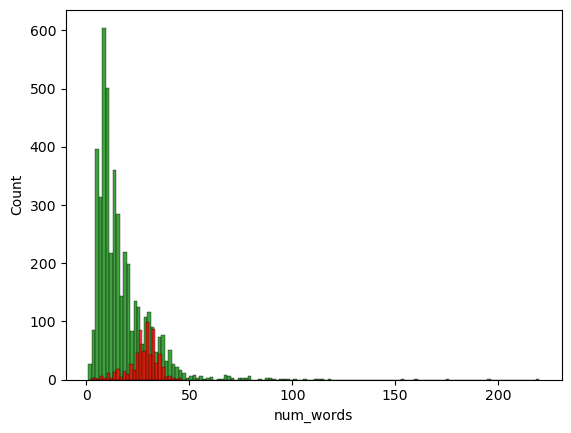

<Figure size 1400x800 with 0 Axes>

In [24]:
sns.histplot(Data[Data['category']==0]['num_words'],color='green')
sns.histplot(Data[Data['category']==1]['num_words'],color='Red')
plt.figure(figsize=(14,8))

C:\Users\Lavanya udhayakumar\DS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lavanya udhayakumar\DS\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x800 with 0 Axes>

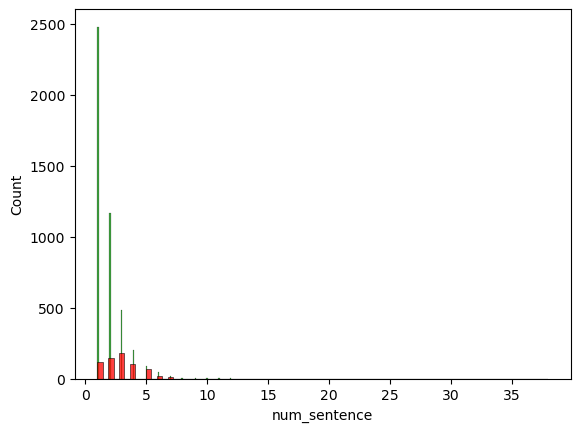

<Figure size 1400x800 with 0 Axes>

In [25]:
sns.histplot(Data[Data['category']==0]['num_sentence'],color='green')
sns.histplot(Data[Data['category']==1]['num_sentence'],color='Red')
plt.figure(figsize=(14,8))

In [26]:
correlation_matrix=Data[['category','num_character','num_words','num_sentence']].corr()
correlation_matrix

,category,num_character,num_words,num_sentence
category,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

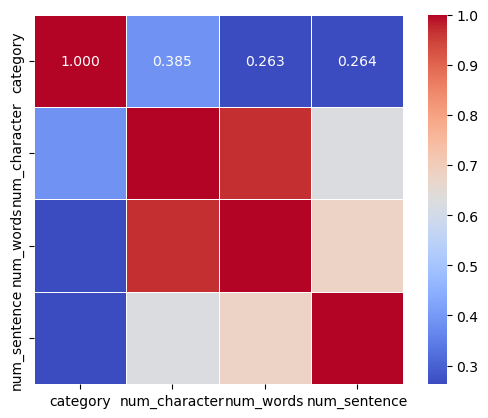

In [27]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, square=True)

In [28]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def transform(message):
    message=message.lower()
    message=nltk.word_tokenize(message)

    y=[]
    for i in message:
        if i.isalnum():
           y.append(i)
        y.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    for i in message:
        y.append(PorterStemmer().stem(i))

    return " ".join(y)

In [30]:
Data['transform']=Data['message'].apply(transform)
Data

C:\Users\Lavanya udhayakumar\AppData\Local\Temp\ipykernel_20544\2722405057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['transform']=Data['message'].apply(transform)


,type,message,category,num_character,num_words,num_sentence,transform
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi .. avail bugi n great wo...
1,ham,Ok lar... Joking wif u oni...,0,29,8,2,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor ... u c alreadi say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah n't think goe usf live around though
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,35,4,2nd time tri 2 contact u. u å£750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,9,1,ì_ b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,15,2,piti mood ... suggest
5570,ham,The guy did some bitching but I acted like i'd...,0,125,27,1,guy bitch act like 'd interest buy someth els ...


In [31]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

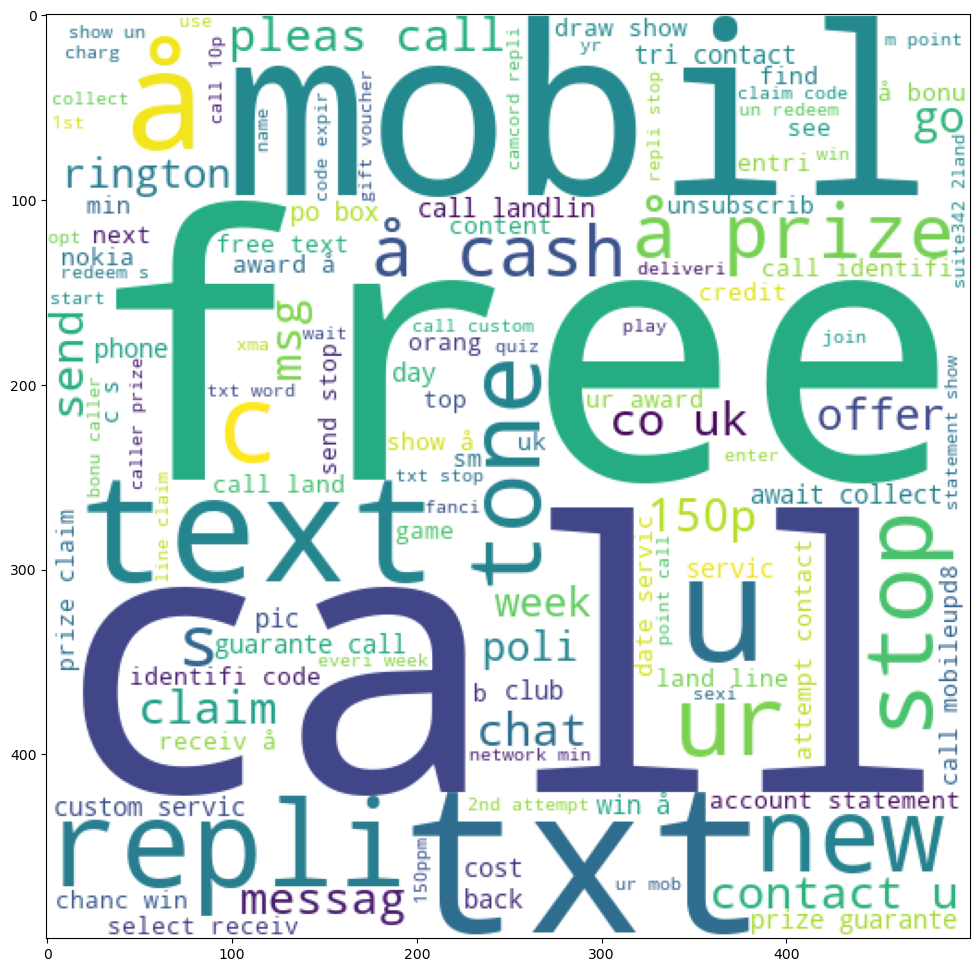

In [32]:
spam_wc=wc.generate(Data[Data['category']==1]['transform'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

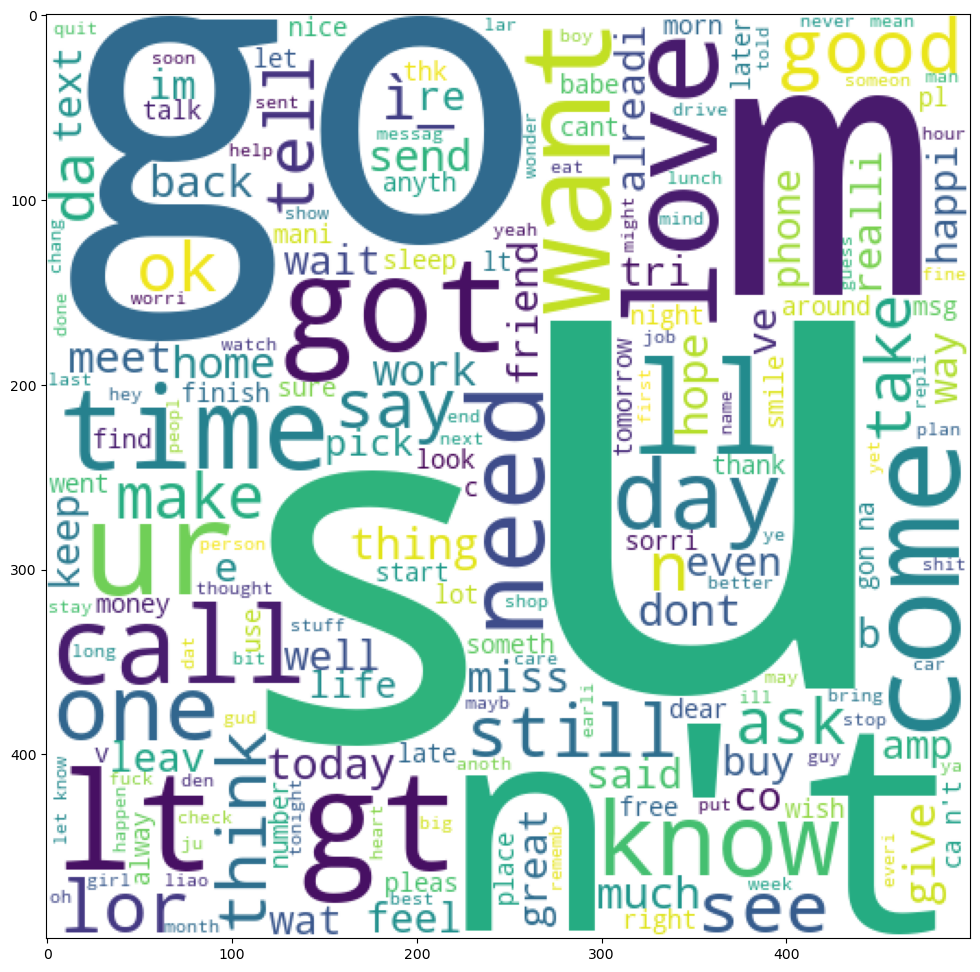

In [33]:
ham_wc=wc.generate(Data[Data['category']==0]['transform'].str.cat(sep=""))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

In [34]:
spam_corpus=[]
for msg in Data[Data['category']==0]['transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [35]:
from collections import Counter
Counter(spam_corpus).most_common(30)
column_1=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
column_2=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

<Figure size 1800x1200 with 0 Axes>

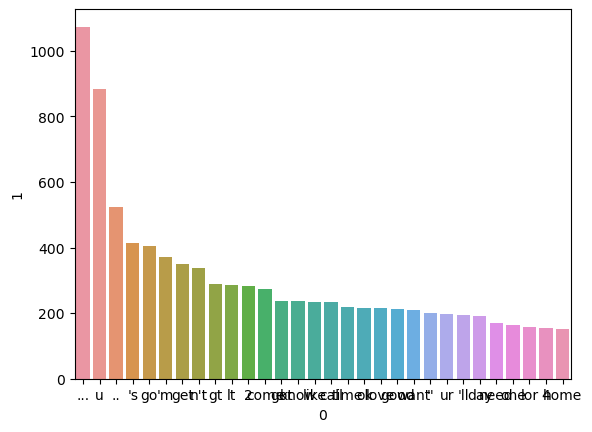

<Figure size 1800x1200 with 0 Axes>

In [36]:
sns.barplot(x=column_1,y=column_2)
plt.figure(figsize=(18,12))

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf=TfidfVectorizer(max_features=3000)

In [38]:
X=tfidf.fit_transform(Data['transform']).toarray()
y=Data['category'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

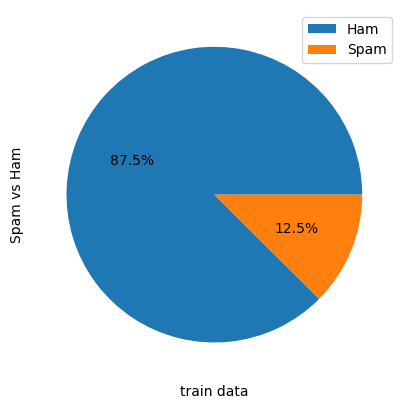

In [39]:
pie_train =pd.Series(y_train).value_counts()
plt.pie(pie_train, autopct = '%1.1f%%')
plt.ylabel("Spam vs Ham")
plt.xlabel('train data')
plt.legend(["Ham", "Spam"])


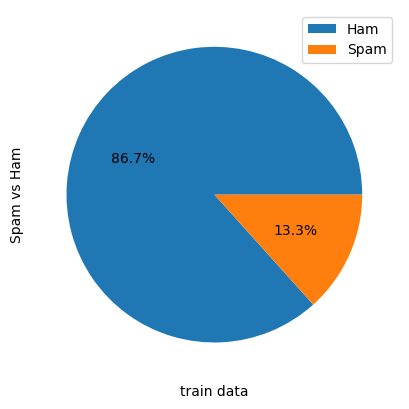

In [40]:
pie_test =pd.Series(y_test).value_counts()
plt.pie(pie_test, autopct = '%1.1f%%')
plt.ylabel("Spam vs Ham")
plt.xlabel('train data')
plt.legend(["Ham", "Spam"])

In [41]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
gnb=GaussianNB() 
bnb=BernoulliNB()
mnb=MultinomialNB()


In [42]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: \n',confusion_matrix(y_test,y_pred1))
print('\nPrecision score of the Gaussian NB is',precision_score(y_test,y_pred1))
print('\n',classification_report(y_test, y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is: 
 [[790 106]
 [ 20 118]]

Precision score of the Gaussian NB is 0.5267857142857143

               precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.65       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [43]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: \n',confusion_matrix(y_test,y_pred2))
print('\nPrecision score of the Multinomial NB is',precision_score(y_test,y_pred2))
print('\n',classification_report(y_test, y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is: 
 [[896   0]
 [ 26 112]]

Precision score of the Multinomial NB is 1.0

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



In [44]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: \n',confusion_matrix(y_test,y_pred3))
print('\nPrecision score of the Bernoulli NB is',precision_score(y_test,y_pred3))
print('\n',classification_report(y_test, y_pred2))

Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is: 
 [[896   0]
 [ 12 126]]

Precision score of the Bernoulli NB is 1.0

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.81      0.90       138

    accuracy                           0.97      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.97      0.97      1034



In [45]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [48]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

input_sms = input("Enter the message")

transformed_sms = transform(input_sms)

vector_input = tfidf.transform([transformed_sms])

result = model.predict(vector_input)[0]

if result == 1:
    print("\nSpam")
else:
    print("\nNot Spam")

Enter the message Dear User, You've got ixigo coupon of Upto Rs.5000 OFF on domestic & international flights on My Winnings. Click on https://t.jio/v/r278 to claim. T&C



Spam
